In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [86]:
df=pd.read_csv("C:\\Users\\suraj\\Downloads\\census_income.csv")
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [87]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

In [88]:
for i in df.columns:
    print(df[i].unique())

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
[ 77516  83311 215646 ...  34066  84661 257302]
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wif

In [89]:
df=df.replace('?',np.NaN)

In [90]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
annual_income        0
dtype: int64

In [91]:
df.dropna(inplace=True)

In [92]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

In [93]:
df.duplicated().sum()

23

In [94]:
df.drop_duplicates(inplace=True)

In [95]:
df.duplicated().sum()

0

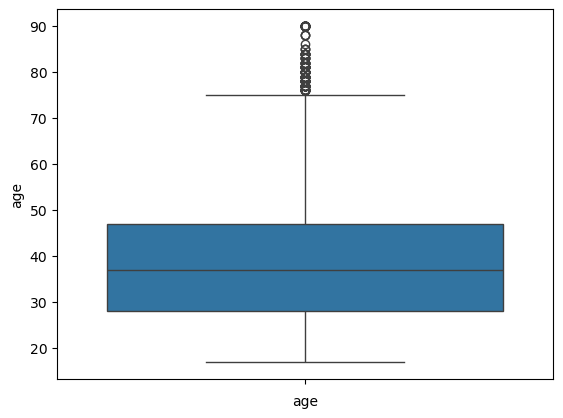

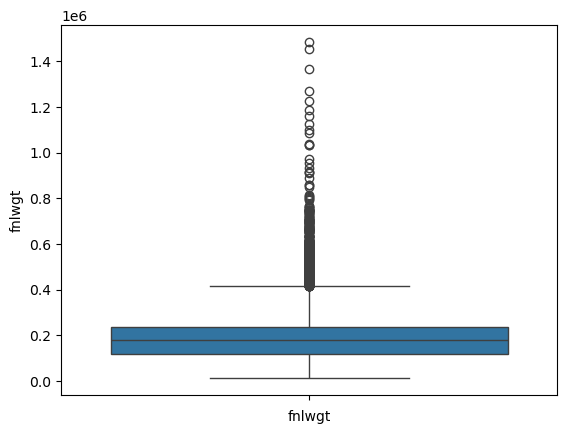

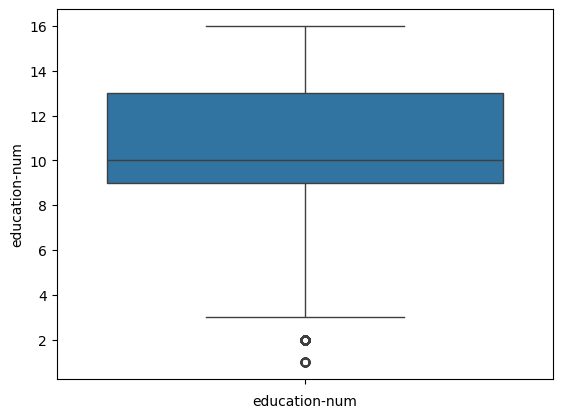

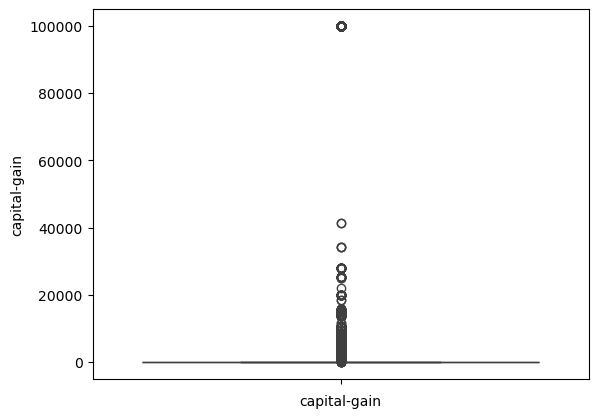

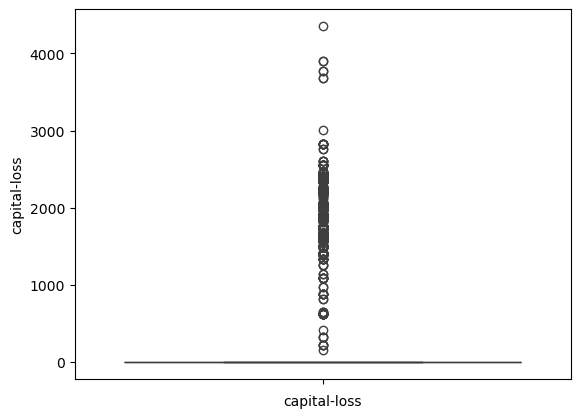

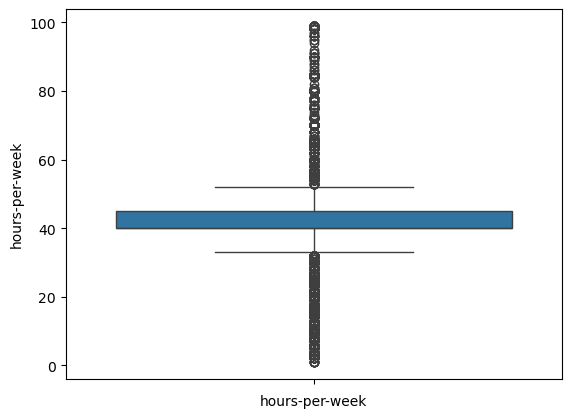

In [96]:
for i in df.columns:
    if df[i].dtype != 'object':
        sns.boxplot(df[i])
        plt.xlabel(i)
        plt.show()

In [97]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'annual_income'],
      dtype='object')

In [98]:
col=['age','fnlwgt','education-num','hours-per-week']
for i in col:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)

    IQR=q3-q1
    lb=q1-1.5*IQR
    ub=q3+1.5*IQR

    df=df[(df[i]>=lb) & (df[i] <=ub)]

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21317 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             21317 non-null  int64 
 1   workclass       21317 non-null  object
 2   fnlwgt          21317 non-null  int64 
 3   education       21317 non-null  object
 4   education-num   21317 non-null  int64 
 5   marital-status  21317 non-null  object
 6   occupation      21317 non-null  object
 7   relationship    21317 non-null  object
 8   race            21317 non-null  object
 9   sex             21317 non-null  object
 10  capital-gain    21317 non-null  int64 
 11  capital-loss    21317 non-null  int64 
 12  hours-per-week  21317 non-null  int64 
 13  native-country  21317 non-null  object
 14  annual_income   21317 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.6+ MB


In [100]:
from sklearn.preprocessing import LabelEncoder

In [101]:
le=LabelEncoder()

In [102]:
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i])

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21317 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             21317 non-null  int64
 1   workclass       21317 non-null  int32
 2   fnlwgt          21317 non-null  int64
 3   education       21317 non-null  int32
 4   education-num   21317 non-null  int64
 5   marital-status  21317 non-null  int32
 6   occupation      21317 non-null  int32
 7   relationship    21317 non-null  int32
 8   race            21317 non-null  int32
 9   sex             21317 non-null  int32
 10  capital-gain    21317 non-null  int64
 11  capital-loss    21317 non-null  int64
 12  hours-per-week  21317 non-null  int64
 13  native-country  21317 non-null  int32
 14  annual_income   21317 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 1.9 MB


In [104]:
x=df.drop(columns='annual_income')
y=df['annual_income']

In [105]:
#Feature selection
#VIF--Variance Inflmation Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [106]:
variance_inflation_factor(x.values,2)

5.1568340585951775

In [107]:
vif_data=pd.DataFrame()
vif_data['Feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif_data

,Feature,VIF
0,age,12.044357
1,workclass,6.165334
2,fnlwgt,5.156834
3,education,10.613509
4,education-num,21.409792
5,marital-status,3.923992
6,occupation,3.073111
7,relationship,2.596909
8,race,19.753027
9,sex,5.027733


In [108]:
x.drop("hours-per-week",axis=1,inplace=True)

In [109]:
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,VIF
0,age,10.930475
1,workclass,6.034345
2,fnlwgt,4.999922
3,education,10.500616
4,education-num,19.473926
5,marital-status,3.826628
6,occupation,3.048149
7,relationship,2.516665
8,race,18.118613
9,sex,4.709615


In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [111]:
x_train, x_test, y_train, y_test=train_test_split(x,y, train_size=0.70,random_state=0)

In [112]:
lr=LogisticRegression()

In [113]:
lr.fit(x_train, y_train)

C:\Users\suraj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [114]:
y_pred=lr.predict(x_test)

In [115]:
from sklearn.metrics import *

In [116]:
accuracy_score(y_test, y_pred)

0.7714196372732958

In [117]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[4401,  309],
       [1153,  533]], dtype=int64)

In [118]:
449/(449+1237)

0.26631079478054565

In [119]:
4510/(4510+1237)

0.7847572646598225

In [120]:
pre=4510/(4510+1237)
pre

0.7847572646598225

In [121]:
rec=4510/(4510+449)
rec

0.9094575519257915

In [122]:
f1=2*(pre*rec)/(pre+rec)
f1

0.8425182140855596

<Axes: >

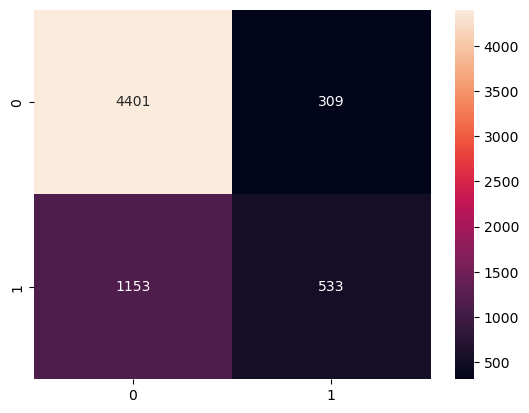

In [123]:
sns.heatmap(cm,annot=True,fmt='d')